### Hypothesis Test : Will the number of Total Hospitilised Patients and the number of Total Deaths per day in Italy increace while we cover Week 17  ? Yes/No 


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPRegressor
import math

import scipy.optimize as optim

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')


from datetime import datetime

#Supress warnings and default INFO logging
import warnings
warnings.filterwarnings('ignore')

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

%matplotlib inline

import seaborn as sns
sns.set()


In [2]:
Covid = pd.read_csv(r'C:\Users\Vasilis\Desktop\covid19_italy_region.csv')
Covid.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [3]:
Covid.tail()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
6022,6022,2020-12-06T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,6023,2020-12-06T17:00:00,ITA,9,Toscana,43.769231,11.255889,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,6024,2020-12-06T17:00:00,ITA,10,Umbria,43.106758,12.388247,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,6025,2020-12-06T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,987,34,5406,333,6726,34644.0
6026,6026,2020-12-06T17:00:00,ITA,5,Veneto,45.434905,12.338452,2508,308,2816,73988,76804,3444,84235,4210,165249,1090932.0


In [4]:
Covid.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,3013.000000,11.857143,43.046293,12.225955,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1739.989368,6.274319,2.488987,2.659168,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,1506.500000,7.000000,41.125596,11.121231,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,3013.000000,12.000000,43.616760,12.388247,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,4519.500000,17.000000,45.434905,13.768136,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,6026.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06


### From the plots we can observe that cases  are increasing exponentially over time

In [5]:
cases = Covid['TotalHospitalizedPatients'].groupby(Covid['Date']).sum().sort_values(ascending=True)



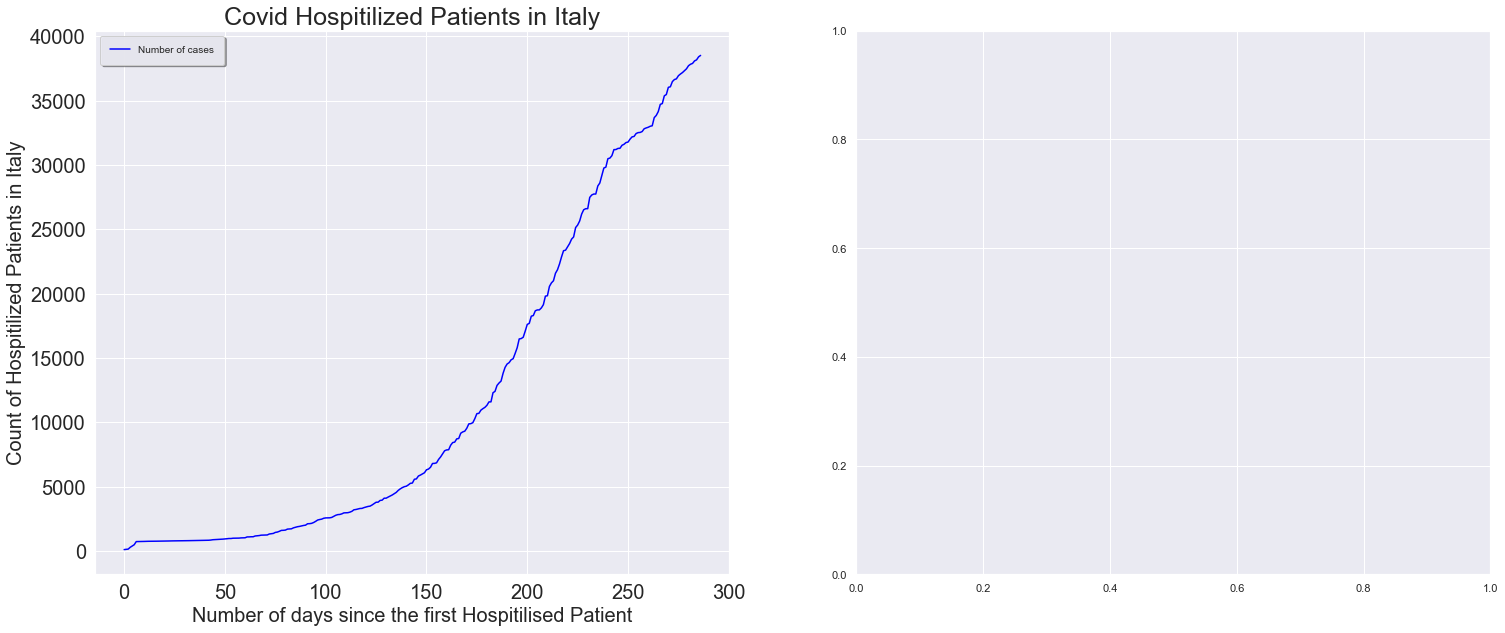

In [13]:
days_since_first_case = np.array([i for i in range(len(cases.index))]).reshape(-1, 1)


fig, ax = plt.subplots(1,2, figsize=(25,10))
ax[0].plot(days_since_first_case, cases, color='blue', label='Number of cases')
ax[0].legend(loc='best')
ax[0].set_xlabel('Number of days since the first Hospitilised Patient', size=20)
ax[0].set_ylabel('Count of Hospitilized Patients in Italy', size=20)
ax[0].set_title('Covid Hospitilized Patients in Italy', size=25)
ax[0].legend(loc = "best"
           , frameon = True
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 10})
ax[0].tick_params(axis="x", labelsize=20)
ax[0].tick_params(axis="y", labelsize=20)



plt.show()

In [15]:
cases = Covid['TotalHospitalizedPatients'].groupby(Covid['Date']).sum().sort_values(ascending=True).apply(np.log)


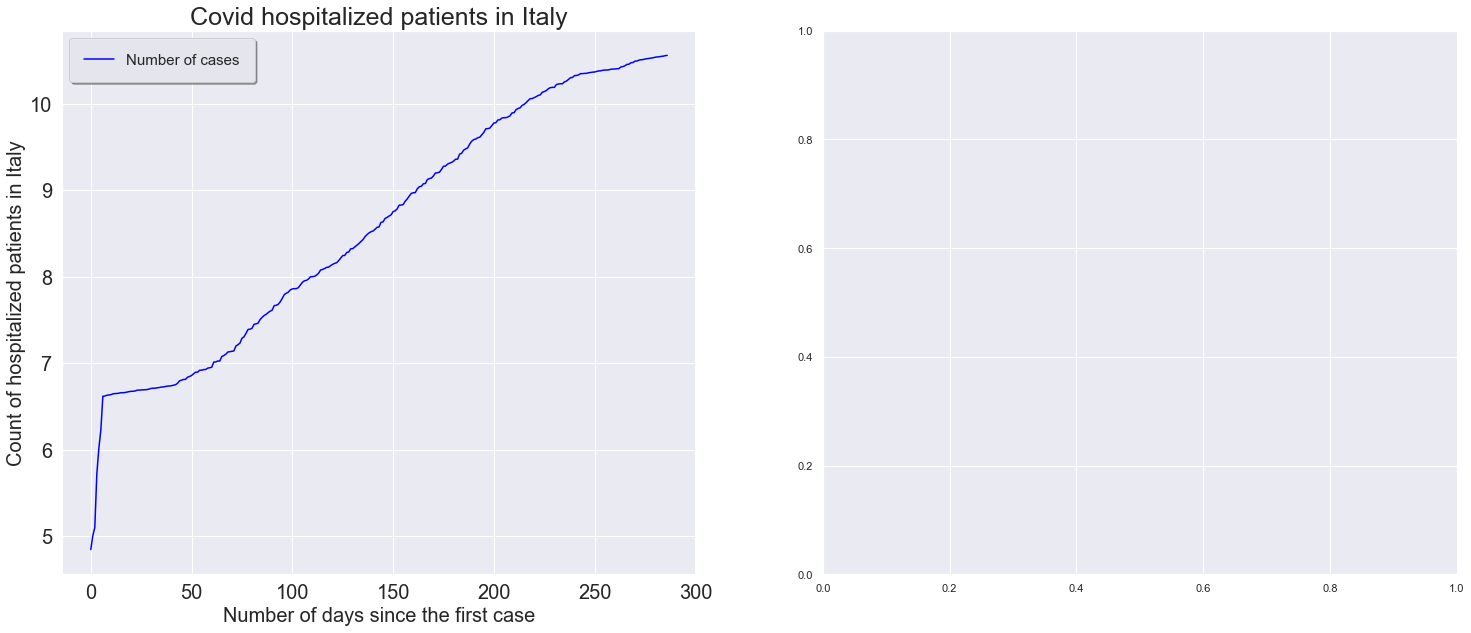

In [16]:
days_since_first_case = np.array([i for i in range(len(cases.index))]).reshape(-1, 1)

fig, ax = plt.subplots(1,2, figsize=(25,10))
ax[0].plot(days_since_first_case, cases, color='blue', label='Number of cases')
ax[0].legend(loc='best')
ax[0].set_xlabel('Number of days since the first case', size=20)
ax[0].set_ylabel('Count of hospitalized patients in Italy', size=20)
ax[0].set_title('Covid hospitalized patients in Italy', size=25)
ax[0].legend(loc = "best"
           , frameon = True
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 15})
ax[0].tick_params(axis="x", labelsize=20)
ax[0].tick_params(axis="y", labelsize=20)


plt.show()

### Linear Regression Model
#### To model confirmed cases and deaths we have taken cases and deaths since first case and first death occurance respectively
#### Converted our data into 1D arrays
#### Split the data for training and testing
#### Created the data for future prediction of cases and deaths (for next 200 days)

In [9]:
days_since_first_case = np.array([i for i in range(len(cases.index))]).reshape(-1, 1)
case_count = np.array(cases).reshape(-1, 1)

days_since_first_death = np.array([i for i in range(len(deaths.index))]).reshape(-1, 1)
death_count = np.array(deaths).reshape(-1, 1)
X_cases = days_since_first_case
y_cases = case_count
X_train_cases, X_test_cases, y_train_cases, y_test_cases = train_test_split(X_cases
                                                    , y_cases
                                                    , test_size= 0.2
                                                    , shuffle=True
                                                    , random_state = 42)
days_in_future = 200
total_days_since_first_case = 232
x_test_case_future = np.linspace(total_days_since_first_case+1, total_days_since_first_case+days_in_future,20).reshape(-1, 1)

In [10]:
lr = LinearRegression()
lr.fit(X_train_cases, y_train_cases)
y_pred_case = lr.predict(X_test_cases)
y_pred_case_forecast = lr.predict(x_test_case_future)

rmse_test_case = math.sqrt(mean_squared_error(y_test_cases, y_pred_case))
r_score_case = r2_score(y_test_cases, y_pred_case)
print('RMSE for test cases = {:.2f}'.format(rmse_test_case))
print('R-squared for test cases = {:.2f}'.format(r_score_case))

RMSE for test cases = 0.14
R-squared for test cases = 0.99


In [11]:
X_death = days_since_first_death
y_death = death_count
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X_death
                                                    , y_death
                                                    , test_size= 0.2
                                                    , shuffle=True
                                                    , random_state = 42)
days_in_future = 200
total_days_since_first_death = 212
x_test_death_future = np.linspace(total_days_since_first_death+1, total_days_since_first_death+days_in_future,20).reshape(-1, 1)


### Step 2: Linear regression model for predicting cases
#### We have made the case predictions using Linear regression on test data as well as forcasted the predictions until June

In [12]:
lr = LinearRegression()
lr.fit(X_train_deaths, y_train_deaths)
y_pred_deaths= lr.predict(X_test_deaths)
y_pred_death_forecast = lr.predict(x_test_death_future)

rmse_test_deaths = math.sqrt(mean_squared_error(y_test_deaths, y_pred_deaths))
r_score_deaths = r2_score(y_test_deaths, y_pred_deaths)
print('RMSE for test deaths = {:.2f}'.format(rmse_test_deaths))
print('R-squared for test deaths = {:.2f}'.format(r_score_deaths))

RMSE for test deaths = 6365.38
R-squared for test deaths = 0.69


### Visualising the prediction for the next 200 days/ Which gives us a prediction if the Total Hospitalised Patients will rise or not until 27/5/21 in Italy regarding the data set we have 


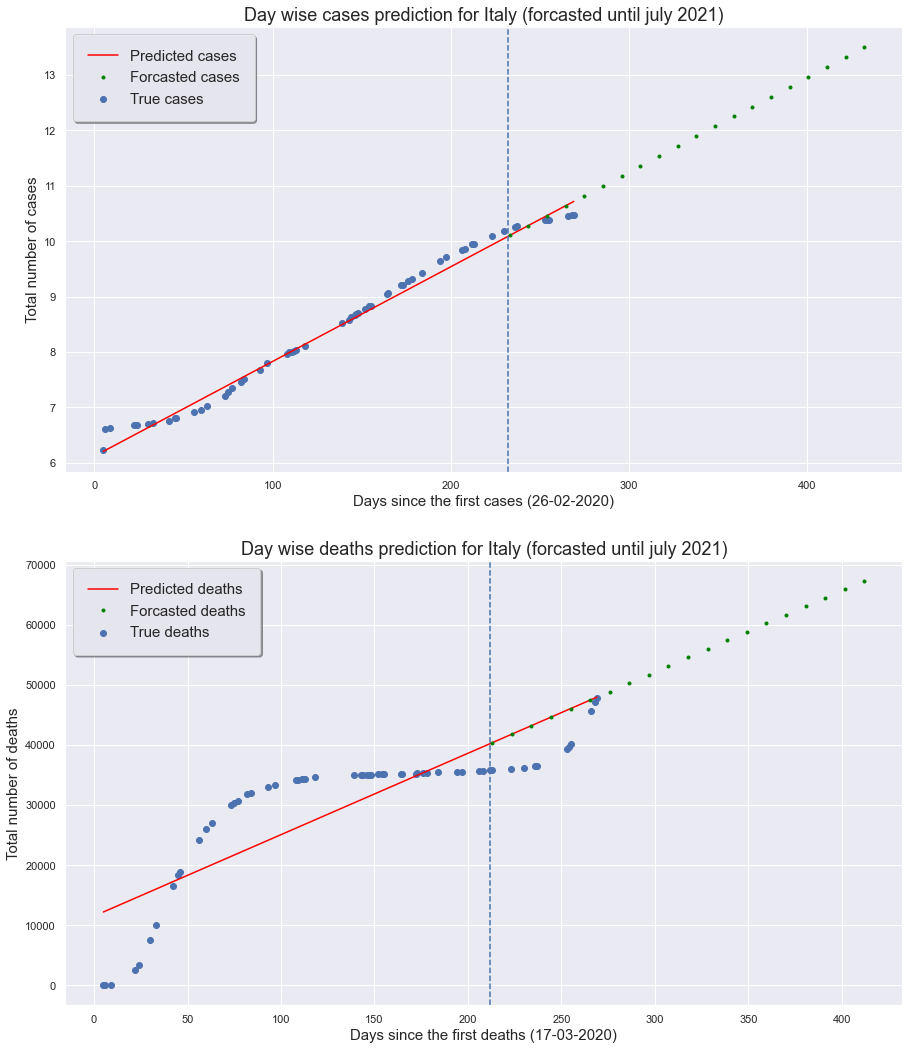

In [13]:
def plot_model(X_test, y_test, y_pred, x_test_future, y_pred_forecast, total_days, start_date, title, axis):
    x_axis_data = X_test
    y_axis_data_true = y_test

    l = sorted(zip(*[x_axis_data,y_axis_data_true]))
    sorted_x_test, y_sorted_test = list(zip(*l))
    axis.scatter(sorted_x_test, y_sorted_test, label=f"True {title}")

    l_pred = sorted(zip(*[x_axis_data,y_pred]))
    sorted_x_test_pred, y_sorted_test_pred = list(zip(*l_pred))
    axis.plot(sorted_x_test_pred, y_sorted_test_pred, label=f"Predicted {title}", color="red")
    axis.plot(x_test_future, y_pred_forecast, '.', label=f"Forcasted {title}", color="green")

    axis.axvline(total_days, linestyle='--')

    axis.set_title(f'Day wise {title} prediction for Italy (forcasted until july 2021)', size=18)
    axis.set_ylabel(f"Total number of {title}", size=15)
    axis.set_xlabel(f"Days since the first {title} {start_date}", size=15)
    axis.legend(loc = "best"
           , frameon = True
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 15})
    

fig, ax = plt.subplots(2,1, figsize=(15,18))
plot_model(X_test_cases,y_test_cases, y_pred_case, x_test_case_future, y_pred_case_forecast, total_days_since_first_case,'(26-02-2020)', 'cases', ax[0])
plot_model(X_test_deaths,y_test_deaths, y_pred_deaths, x_test_death_future, y_pred_death_forecast, total_days_since_first_death, '(17-03-2020)', 'deaths', ax[1])
plt.show()

In [14]:
lr.score(X_test_deaths,y_test_deaths)

0.6918217970347782

In [15]:
print('Coefficient: \n', lr.coef_)

Coefficient: 
 [[135.50020697]]


###  Logistic growth and Prophet Model for Forecasting

#### From the previous analysis, coronavirus outbreak seems to be an exponential growth, but there cannot be an exponential forever as the outbreak would stabilize slowly when most of the people are infected by it. This kind of growth is similar to a logistic growth.

#### Therefore, we shall be modifying the Logistic regression generally used for classification task to perform the regression task by modifying the formula as follows:

#### Logistic regression formula (for classification): y(t) = 1 / (1 + np.exp(-b * t)

#### Modified Logistic growth formula (for regression): y(t) = c / (1 + a np.exp(-b t))

#### The Logistic growth formula is used to calculate the day of fastest growth and the cases/deaths on the fastest growing day.



## Sigmoid Function

### Every point on the sigmoid will give us the number of cases for each day
### Trying to fix the slope of the sigmoid is the target goal in order to flatten the curve and slow the hole growth of the pandemic and save tha maximum available resources we have in the hospitals for a longer period of time and save more people. 

## Target Goal : 
### Bring the slope of the curve of the spread of the disease below the resources line to cause minimum number of deaths. Only way to do that is my minimizing community transmision.

In [16]:
from fbprophet import Prophet

### Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [17]:
cases = Covid['TotalHospitalizedPatients'].groupby(Covid['Date']).sum().sort_values(ascending=True).reset_index()



In [18]:
cases.columns = ['ds','y']
cases['ds'] = pd.to_datetime(cases['ds'])



In [19]:
cases.tail()

,ds,y
282,2020-11-26 17:00:00,37884
283,2020-11-22 17:00:00,38080
284,2020-11-25 17:00:00,38161
285,2020-11-24 17:00:00,38393
286,2020-11-23 17:00:00,38507


##### Generating 179 days ahead of confirmed cases of Covid-19 TotalHospitalPatients, with 95% prediction interval by creating a base model with no tweaking of seasonality-related and additional regressors

In [20]:
m = Prophet(interval_width=0.95)
m.fit(cases)
future = m.make_future_dataframe(periods=179)
                            
future.tail(7)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
459,2021-05-28 17:00:00
460,2021-05-29 17:00:00
461,2021-05-30 17:00:00
462,2021-05-31 17:00:00
463,2021-06-01 17:00:00
464,2021-06-02 17:00:00
465,2021-06-03 17:00:00


### Predictions for Week 17 of the program ( 28/5-3/6)
### Total Hospitalised Patients in Italy

#### The predict methong will assign each row in future predicted value which it names yhat. If you pass in historical dates, it will provide in-sample fit. The forecast object here is a new dataframe that includes yhat with the forecast, as well as columns for components and uncertainty intervals

In [21]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
461,2021-05-30 17:00:00,97296.160633,81915.051436,156633.131506,62886.856605,135471.547591,19010.477649,19010.477649,19010.477649,19115.38778,19115.38778,19115.38778,-104.910130,-104.910130,-104.910130,0.0,0.0,0.0,116306.638282
462,2021-05-31 17:00:00,97750.810778,81216.311263,157170.094716,63255.375753,136252.308468,19659.807842,19659.807842,19659.807842,19115.38778,19115.38778,19115.38778,544.420062,544.420062,544.420062,0.0,0.0,0.0,117410.618620
463,2021-06-01 17:00:00,98205.460923,81879.355895,157154.655024,63593.593895,137033.069345,19760.216366,19760.216366,19760.216366,19115.38778,19115.38778,19115.38778,644.828586,644.828586,644.828586,0.0,0.0,0.0,117965.677289
464,2021-06-02 17:00:00,98660.111069,80810.016822,158497.632937,63716.980024,137764.079134,18843.369202,18843.369202,18843.369202,19115.38778,19115.38778,19115.38778,-272.018578,-272.018578,-272.018578,0.0,0.0,0.0,117503.480270
465,2021-06-03 17:00:00,99114.761214,82607.946276,158521.461233,63886.606538,138356.173423,18846.103897,18846.103897,18846.103897,19115.38778,19115.38778,19115.38778,-269.283882,-269.283882,-269.283882,0.0,0.0,0.0,117960.865111


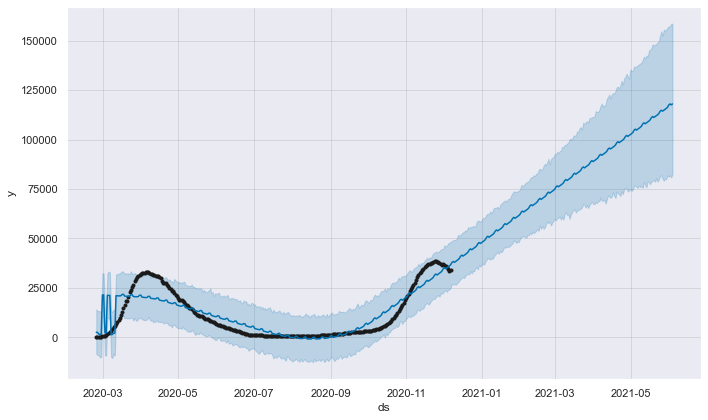

In [22]:
cases_forecast_plot = m.plot(forecast)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [24]:
metric_df = forecast.set_index('ds')[['yhat']].join(cases.set_index('ds').y).reset_index()
metric_df.tail(100)


,ds,yhat,y
366,2021-02-24 17:00:00,72947.766037,NaN
367,2021-02-25 17:00:00,73405.150878,NaN
368,2021-02-26 17:00:00,73853.602135,NaN
369,2021-02-27 17:00:00,74316.181762,NaN
370,2021-02-28 17:00:00,74933.475065,NaN
...,...,...,...
461,2021-05-30 17:00:00,116306.638282,NaN
462,2021-05-31 17:00:00,117410.618620,NaN
463,2021-06-01 17:00:00,117965.677289,NaN
464,2021-06-02 17:00:00,117503.480270,NaN


In [26]:
r2_score(forecast.yhat_upper, metric_df.yhat)

0.8458171288438825

In [27]:
mean_squared_error(forecast.yhat_upper, metric_df.yhat)

277884436.998444